In [2]:
import keras
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
%matplotlib inline

Label :  5


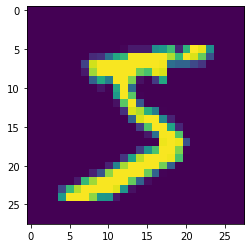

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.imshow(np.array(x_train[0]).reshape(28,28))
print("Label : ", y_train[0])

Label :  0


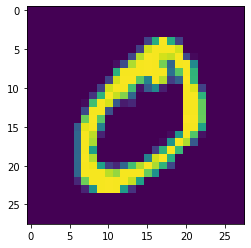

In [11]:
plt.imshow(np.array(x_train[1]).reshape(28,28))
print("Label : ", y_train[1])

Label :  4


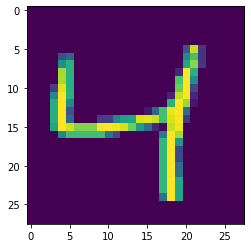

In [12]:
plt.imshow(np.array(x_train[2]).reshape(28,28))
print("Label : ", y_train[2])

In [13]:
inp = np.array([[1, 2, 3, 4],
       [5, 5, 1, 4],
       [4, 5, 7, 6]])

inp.shape
#1 2 3 4 5 5 1 4 4 5 7 6

(3, 4)

In [14]:
output = inp.flatten()

In [15]:
output.shape

(12,)

In [16]:
x_train[0].shape

(28, 28)

In [17]:
x_train[0].flatten().shape

(784,)

In [18]:
dat_train = []
for dat in x_train:
  dat_train.append(dat.flatten())

In [19]:
dat_test = []
for dat in x_test:
  dat_test.append(dat.flatten())

In [20]:
train_flatten = pd.DataFrame(dat_train)

In [21]:
test_flatten = pd.DataFrame(dat_test)

In [22]:
train_flatten.shape

(60000, 784)

In [22]:
test_flatten.shape

(10000, 784)

In [23]:
y_train.shape

(60000,)

In [24]:
y_test.shape

(10000,)

In [25]:
model = SVC()

In [26]:
model.fit(train_flatten.head(1000),y_train[:1000])

SVC()

In [27]:
train_pred = model.predict(train_flatten.head(1000))
accuracy_score(y_train[:1000], train_pred)

0.993

In [28]:
test_pred = model.predict(test_flatten)
accuracy_score(y_test, test_pred)

0.3336

In [29]:
kernal = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernal:
  print("kernal = ",i)
  model = SVC(kernel = i)
  model.fit(train_flatten.head(1000),y_train[:1000])
  train_pred = model.predict(train_flatten.head(1000))
  train_acc = accuracy_score(y_train[:1000], train_pred)
  test_pred = model.predict(test_flatten)
  test_acc = accuracy_score(y_test, test_pred)
  print("Train Accuracy : ",train_acc, "Test Accuracy : ",test_acc )

kernal =  linear
Train Accuracy :  1.0 Test Accuracy :  0.2051
kernal =  poly
Train Accuracy :  0.823 Test Accuracy :  0.1135
kernal =  rbf
Train Accuracy :  0.993 Test Accuracy :  0.3336
kernal =  sigmoid
Train Accuracy :  0.627 Test Accuracy :  0.218


In [30]:
params_grid = {'C': [0.01, 0.1, 1.0,10,100,1000],
               'gamma' : [0, 1,0.1,0.001,0.0001,'scale', 'auto'],
               'kernel':['rbf']}

In [32]:
grid = GridSearchCV(SVC(),param_grid=params_grid, verbose=5)
grid.fit(train_flatten.head(1000),y_train[:1000])

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .......C=0.01, gamma=0, kernel=rbf;, score=0.115 total time=   0.3s
[CV 2/5] END .......C=0.01, gamma=0, kernel=rbf;, score=0.120 total time=   0.3s
[CV 3/5] END .......C=0.01, gamma=0, kernel=rbf;, score=0.120 total time=   0.3s
[CV 4/5] END .......C=0.01, gamma=0, kernel=rbf;, score=0.115 total time=   0.3s
[CV 5/5] END .......C=0.01, gamma=0, kernel=rbf;, score=0.115 total time=   0.3s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.115 total time=   0.4s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.120 total time=   0.4s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.120 total time=   0.3s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.115 total time=   0.4s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.115 total time=   0.4s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.115 total time=   0.3s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100, 1000],
                         'gamma': [0, 1, 0.1, 0.001, 0.0001, 'scale', 'auto'],
                         'kernel': ['rbf']},
             verbose=5)

In [ ]:
!pip install keras

In [33]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [34]:
train_pred = grid.predict(train_flatten.head(1000))
train_acc = accuracy_score(y_train[:1000], train_pred)
test_pred = grid.predict(test_flatten)
test_acc = accuracy_score(y_test, test_pred)
print("Train Accuracy : ",train_acc, "Test Accuracy : ",test_acc )

Train Accuracy :  1.0 Test Accuracy :  0.3358


In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=784)

In [25]:
X_train = pca.fit_transform(train_flatten)
X_test = pca.transform(test_flatten)


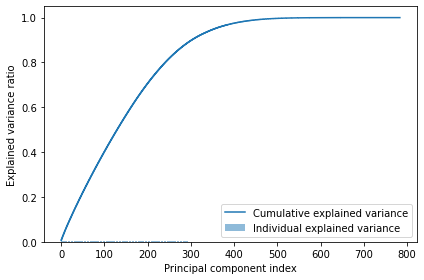

In [26]:


exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

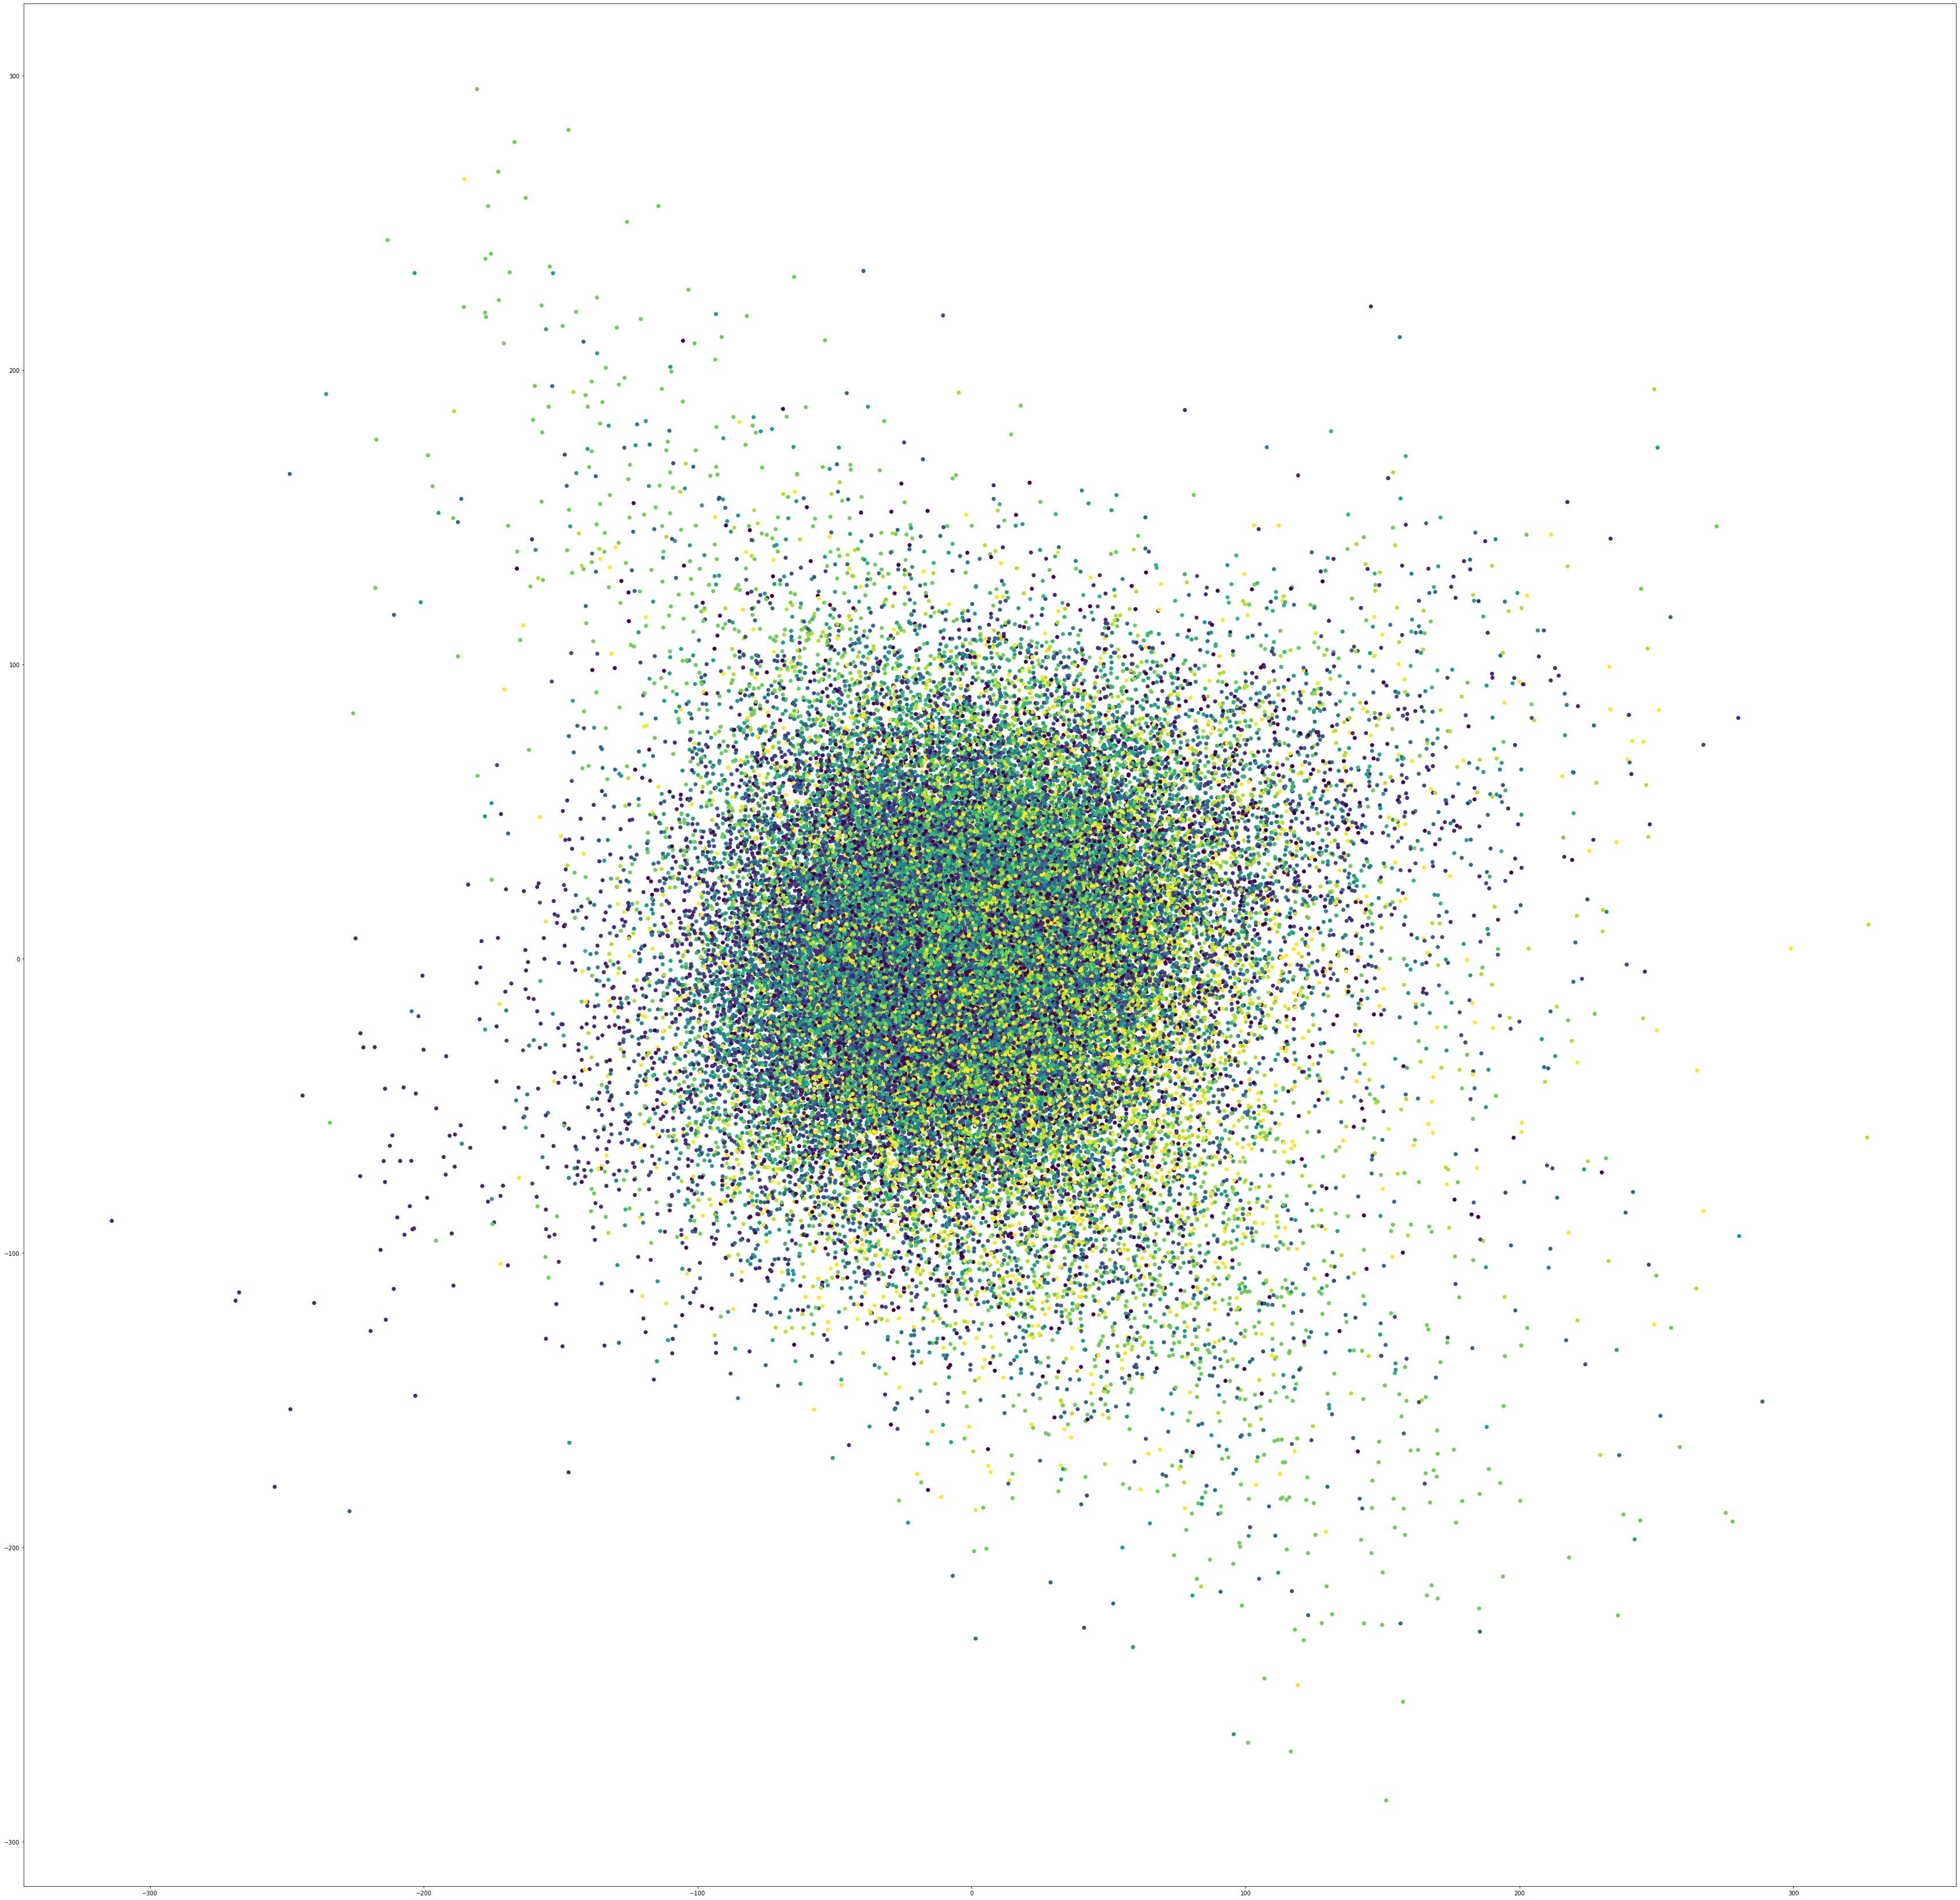

In [27]:
from IPython.core.pylabtools import figsize
plt.figure(figsize = (60,60))
plt.scatter(X_train[:,0],X_train[:,1],c =y_train )


In [ ]:
%%time
model = SVC()
model.fit(X_train[:20000,:200],y_train[:20000])
train_pred = model.predict(X_train[:20000,:200])
train_acc = accuracy_score(y_train[:20000], train_pred)
test_pred = model.predict(X_test[:,:200])
test_acc = accuracy_score(y_test, test_pred)
print("Train Accuracy : ",train_acc, "Test Accuracy : ",test_acc )

In [114]:
test_pred.shape

(10000,)